In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
url="https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"
data = pd.read_csv(url)
data.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [34]:
data.shape

(891, 12)

In [35]:
#target to is predict passenger  is survived or not

In [36]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [38]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [39]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [40]:
data.Age.fillna(data['Age'].mean(),inplace=True)
data['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
5      29.699118
6      54.000000
7       2.000000
8      27.000000
9      14.000000
10      4.000000
11     58.000000
12     20.000000
13     39.000000
14     14.000000
15     55.000000
16      2.000000
17     29.699118
18     31.000000
19     29.699118
20     35.000000
21     34.000000
22     15.000000
23     28.000000
24      8.000000
25     38.000000
26     29.699118
27     19.000000
28     29.699118
29     29.699118
         ...    
861    21.000000
862    48.000000
863    29.699118
864    24.000000
865    42.000000
866    27.000000
867    31.000000
868    29.699118
869     4.000000
870    26.000000
871    47.000000
872    33.000000
873    47.000000
874    28.000000
875    15.000000
876    20.000000
877    19.000000
878    29.699118
879    56.000000
880    25.000000
881    33.000000
882    22.000000
883    28.000000
884    25.000000
885    39.000000
886    27.000000
887    19.000000
888    29.6991

In [41]:
x = data[['Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare']]
y=data['Survived']

In [42]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500


In [43]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [44]:
x.isna().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [51]:
x = pd.get_dummies(x,drop_first=True)
x.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,3,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,0
2,3,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,0
4,3,35.0,0,0,8.0500,1


In [58]:
from sklearn.preprocessing import StandardScaler

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
scaler=StandardScaler()

In [62]:
x_scaled=scaler.fit_transform(x)
x_scaled

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 0.82737724, -0.5924806 ,  0.43279337, -0.47367361, -0.50244517,
         0.73769513],
       [-1.56610693,  0.63878901,  0.43279337, -0.47367361,  0.78684529,
        -1.35557354],
       [ 0.82737724, -0.2846632 , -0.4745452 , -0.47367361, -0.48885426,
        -1.35557354],
       ...,
       [ 0.82737724,  0.        ,  0.43279337,  2.00893337, -0.17626324,
        -1.35557354],
       [-1.56610693, -0.2846632 , -0.4745452 , -0.47367361, -0.04438104,
         0.73769513],
       [ 0.82737724,  0.17706291, -0.4745452 , -0.47367361, -0.49237783,
         0.73769513]])

In [82]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1090)

In [76]:
model = DecisionTreeClassifier()

In [77]:
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [78]:
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [84]:
pred=model.predict(x_test)
pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0], dtype=int64)

In [85]:
model.score(x_train,y_train)

0.9805389221556886

In [86]:
model.score(x_test,y_test)

0.820627802690583

In [87]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score,roc_curve

In [88]:
cm = confusion_matrix(y_test,pred)

In [89]:
cm

array([[132,  17],
       [ 23,  51]], dtype=int64)

In [188]:
criterion = ['gini','entropy']
features = ['auto','sqrt','log2']
depth = [int(x) for x in np.linspace(5,30,6)]
min_sample_split =[2,5,15,30,100]
min_sample_leaf = [1,2,4,12]


In [189]:
random_grid = {'criterion':criterion,
               'max_features': features,
               'max_depth': depth,
               'min_samples_split': min_sample_split,
               'min_samples_leaf': min_sample_leaf}

In [223]:
modr = RandomizedSearchCV(model,param_distributions=random_grid,cv=8,n_iter=15,random_state=678,n_jobs=1)

In [224]:
modr.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=8, error_score='raise-deprecating',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          fit_params=None, iid='warn', n_iter=15, n_jobs=1,
          param_distributions={'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 15, 30, 100], 'min_samples_leaf': [1, 2, 4, 12]},
          pre_dispatch='2*n_jobs', random_state=678, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [225]:
modr.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'gini'}

In [226]:
modr.score(x_train,y_train)

0.8652694610778443

In [227]:
modr.score(x_test,y_test)

0.820627802690583

In [228]:
ypred=modr.predict(x_test)
ypred

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0], dtype=int64)

In [229]:
confusion_matrix(y_test,ypred)

array([[133,  16],
       [ 24,  50]], dtype=int64)

In [230]:
accuracy_score(y_test,ypred)

0.820627802690583

In [231]:
fpr, tpr, thresholds = roc_curve(y_test, pred)

In [232]:
acc = roc_auc_score(y_test,ypred)
acc

0.7841465626700526

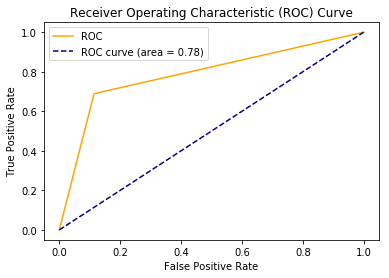

In [233]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % acc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

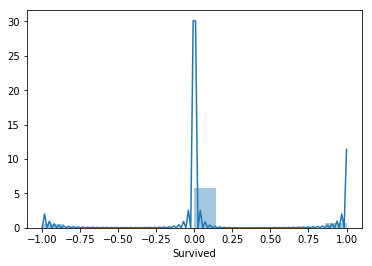

In [234]:
sns.distplot(y_test-ypred)